In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import plotly.express as px

In [3]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

/opt/homebrew/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/homebrew/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [28]:
questionaire_df = pd.read_csv('/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Galactagogue_buying_patterns/data/Ryan_DataforRay_MissingReplaced_2022.09.30.csv')
questionaire_df.head(20)

,ID,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle,domperidone,metaclopramide,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,1,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2,3,2,2,2,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2
1,2,1,2,2,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2
2,3,1,1,2,2,1,1,1,1,1,1,3,3,3,2,1,1,1,3,1,3,1,2,2,3,3,3,3,3,3,2,3,3,3,1,2,1,2,1,3,3,1,2,1,2,1,1,1,1,2,1,2,1,1,2,2,1,2,2,2,3,2,1,1,2
3,4,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,2,2,1,1,1,2,1,2,2,2,2,2,2,2,2
4,5,1,1,2,2,1,1,3,2,2,3,3,3,3,2,1,1,1,3,2,1,1,2,1,3,3,3,3,3,3,3,3,3,3,2,2,2,3,3,3,2,3,3,3,2,1,2,2,1,1,2,2,1,1,1,2,1,1,1,1,2,2,2,1,2
5,6,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,2,3,3,3,3,3,3,3,2,1,2,1,1,1,1,2,2,1,1,2,1,1,2,2,2,2,1,2,2
6,7,1,2,2,3,2,2,2,3,1,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,1,3,3,3,3,3,3,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2
7,8,1,2,2,1,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,1,1,1,-99,1,-99,1,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,3,1,1,1,1,1,1,1,2,2,1,1,1,1,2,1,1,1,2,1,2,2,1,-99,2,2,1,1
8,9,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,3,1,2,2,2,1,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2
9,10,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2


In [7]:
questionaire_df.shape

(1420, 65)

Checking for null values.

In [8]:
questionaire_df.isna().sum() 

ID              0
everbev         0
everherb        0
evermed         0
oats            0
               ..
onlineforum     0
blog            0
websites        0
searchengine    0
app             0
Length: 65, dtype: int64

In [9]:
questionaire_df.columns

Index(['ID', 'everbev', 'everherb', 'evermed', 'oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat', 'ComboSupp',
       'fenugreek', 'thistel', 'shatavari', 'goatrue', 'moringa', 'alfalfa',
       'fennel', 'milkthistle', 'nettle', 'domperidone', 'metaclopramide',
       'increasebf', 'increaseexpress', 'skintoskin', 'shield', 'massage',
       'pumpwhilebf', 'pumpboth', 'pumpafter', 'warmed', 'reducestress',
       'coparent', 'family', 'friend', 'lactationconsult', 'pediatrician',
       'obgyn', 'midwife', 'doula', 'nurse', 'wic', 'hospital', 'books',
       'facebook', 'instagram', 'twitter', 'pinterest', 'onlineforum', 'blog',
       'websites', 'searchengine', 'app'],
      dtype='object')

For our analysis, we are only selecting the galactagogues

In [10]:
food_items = ['ID','oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat']
food_items_df = pd.DataFrame(data = questionaire_df, columns = food_items)
food_items_df.head()

,ID,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat
0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,2,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,3,2,1,1,1,1,1,1,3,3,3,2,1,1,1,3,1,3,1
3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,5,2,1,1,3,2,2,3,3,3,3,2,1,1,1,3,2,1,1


# Exploratory Data Analysis

In [11]:
food_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1420 non-null   int64
 1   oats            1420 non-null   int64
 2   lacttreathome   1420 non-null   int64
 3   lacttreatstore  1420 non-null   int64
 4   brewersyeast    1420 non-null   int64
 5   coconutdrink    1420 non-null   int64
 6   sportdrink      1420 non-null   int64
 7   pinkdrink       1420 non-null   int64
 8   noalcbeer       1420 non-null   int64
 9   beer            1420 non-null   int64
 10  wine            1420 non-null   int64
 11  lacttea         1420 non-null   int64
 12  fruit           1420 non-null   int64
 13  veg             1420 non-null   int64
 14  seeds           1420 non-null   int64
 15  beans           1420 non-null   int64
 16  wholegrains     1420 non-null   int64
 17  nuts            1420 non-null   int64
 18  meat            1420 non-nul

There are 1420 non null rows in the data set with all the columns having integer datatype.

Dropping the rows having -99 value as it signifies missing responses from the candidate.

In [12]:
food_items_df=food_items_df.replace(-99,np.nan).dropna(axis = 0, how = 'any')

In [13]:
food_items_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1348.0,703.273739,409.356476,1.0,346.75,700.5,1059.25,1420.0
oats,1348.0,2.297478,0.859771,1.0,1.00,3.0,3.00,3.0
lacttreathome,1348.0,2.721068,0.583822,1.0,3.00,3.0,3.00,3.0
lacttreatstore,1348.0,2.677300,0.605975,1.0,3.00,3.0,3.00,3.0
brewersyeast,1348.0,2.790059,0.533640,1.0,3.00,3.0,3.00,3.0
coconutdrink,1348.0,2.765579,0.568880,1.0,3.00,3.0,3.00,3.0
sportdrink,1348.0,2.497033,0.777843,1.0,2.00,3.0,3.00,3.0
pinkdrink,1348.0,2.916914,0.338886,1.0,3.00,3.0,3.00,3.0
noalcbeer,1348.0,2.977745,0.166479,1.0,3.00,3.0,3.00,3.0
beer,1348.0,2.901335,0.365430,1.0,3.00,3.0,3.00,3.0


In [15]:
food_items_df['oats'].value_counts()

3.0    758
1.0    357
2.0    233
Name: oats, dtype: int64

In [16]:
food_items_df.iloc[:,1:].shape

(1348, 18)

Replacing with 1 with True while 2 and 3 with False

In [17]:
food_items_df = food_items_df.iloc[:,1:].replace({3: False,1: True, 2: False}, regex = True)

In [22]:
food_items_df.head(10)

,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,True,True,True,True,True,False,False,False,False,True,True,True,False,True,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,True,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
food_counts = []
for i in food_items_df.columns:
    food_counts.append((food_items_df[i] == True).sum())

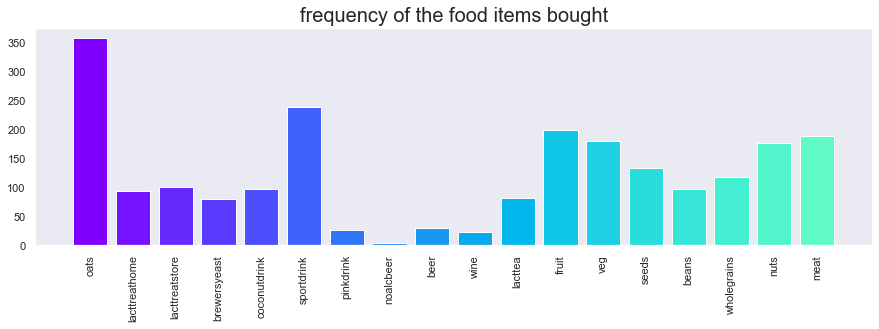

In [20]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.figure(figsize=(15,4))
plt.bar(food_items_df.columns, food_counts,color = color)
plt.title('frequency of the food items bought', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

__TERMINOLOGIES__

__Support__ : Its the default popularity of an item. In mathematical terms, the support of item A is the ratio of transactions involving A to the total number of transactions.

__Confidence__ : Likelihood that customer will buy both products A and B. It is the ratio of the number of transactions involving both A and B and the number of transactions involving B.
    
    Confidence(A => B) = Support(A, B)/Support(A)

__Lift__ : Increase in the sale of A when you sell B.

    Lift(A => B) = Confidence(A, B)/Support(B)

    Lift (A => B) = 1 means that there is no correlation within the itemset.

    Lift (A => B) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset, A, and B, are more likely to be bought together.
    
    Lift (A => B) < 1 means that there is a negative correlation within the itemset, i.e., products in itemset, A, and B, are unlikely to be bought together.

Calculating the support for each of the galactagogues

In [22]:
#Calculate the support
support = food_items_df.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support

,support
oats,0.264837
sportdrink,0.177300
fruit,0.146884
meat,0.139466
veg,0.133531
nuts,0.130564
seeds,0.098665
wholegrains,0.087537
lacttreatstore,0.074184
coconutdrink,0.071958


__Apriori Algorithm:__ refers to the algorithm which is used to calculate the association rules between objects. It means how two or more objects are related to one another. In other words, we can say that the apriori algorithm is an association rule leaning that analyzes that people who bought product A also bought product B.

Apriori algorithm assumes that any subset of a frequent itemset must be frequent. Its the algorithm behind Market Basket Analysis. Say, a transaction containing {Grapes, Apple, Mango} also contains {Grapes, Mango}. So, according to the principle of Apriori, if {Grapes, Apple, Mango} is frequent, then {Grapes, Mango} must also be frequent.

In [23]:
frequent_itemsets = apriori(food_items_df, min_support= 70/len(food_items_df), use_colnames=True, max_len = 2)
rules = association_rules(frequent_itemsets, metric="confidence",  min_threshold = 0.1)

In [24]:
display(rules.sort_values(by ='confidence', ascending=False).head(10))
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(brewersyeast),(oats),0.059347,0.264837,0.054154,0.912500,3.445518,0.038437,8.401865
0,(lacttreathome),(oats),0.069733,0.264837,0.060831,0.872340,3.293879,0.042363,5.758778
13,(seeds),(oats),0.098665,0.264837,0.083828,0.849624,3.208104,0.057698,4.888835
45,(beans),(veg),0.071958,0.133531,0.060831,0.845361,6.330813,0.051222,5.603165
35,(beans),(fruit),0.071958,0.146884,0.059347,0.824742,5.614912,0.048778,4.867778
57,(beans),(meat),0.071958,0.139466,0.058605,0.814433,5.839658,0.048570,4.637323
30,(veg),(fruit),0.133531,0.146884,0.108309,0.811111,5.522110,0.088695,4.516495
55,(beans),(nuts),0.071958,0.130564,0.057864,0.804124,6.158857,0.048468,4.438701
19,(nuts),(oats),0.130564,0.264837,0.102374,0.784091,2.960657,0.067796,3.404966
15,(beans),(oats),0.071958,0.264837,0.056380,0.783505,2.958445,0.037323,3.395754


Rules identified:  64


In [25]:
rules_1 = association_rules(frequent_itemsets, metric="lift",  min_threshold = 3)

In [26]:
display(rules_1.sort_values(by ='lift', ascending=False).head(10))
print("Rules identified: ", len(rules_1))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,(veg),(beans),0.133531,0.071958,0.060831,0.455556,6.330813,0.051222,1.704566
21,(beans),(veg),0.071958,0.133531,0.060831,0.845361,6.330813,0.051222,5.603165
31,(beans),(nuts),0.071958,0.130564,0.057864,0.804124,6.158857,0.048468,4.438701
30,(nuts),(beans),0.130564,0.071958,0.057864,0.443182,6.158857,0.048468,1.666687
33,(beans),(meat),0.071958,0.139466,0.058605,0.814433,5.839658,0.048570,4.637323
32,(meat),(beans),0.139466,0.071958,0.058605,0.420213,5.839658,0.048570,1.600659
23,(wholegrains),(veg),0.087537,0.133531,0.066024,0.754237,5.648399,0.054335,3.525632
22,(veg),(wholegrains),0.133531,0.087537,0.066024,0.494444,5.648399,0.054335,1.804872
11,(beans),(fruit),0.071958,0.146884,0.059347,0.824742,5.614912,0.048778,4.867778
10,(fruit),(beans),0.146884,0.071958,0.059347,0.404040,5.614912,0.048778,1.557222


Rules identified:  40


__Antecedent:__ refers to the items on the LEFT ie., the item which the customer buy.

__Consequent:__ refers to the items on the RIGHT ie., the item which the customer follows to buy.

In [82]:
fig = px.scatter_3d(rules, x='confidence', y='support', z='lift', opacity=0.7, color='antecedents')
                    #color='petal_length', symbol='species')
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

/opt/homebrew/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/homebrew/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<>:24: DeprecationWarning:

invalid escape sequence \d

<>:24: DeprecationWarning:

invalid escape sequence \d

/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_8199/2187697085.py:24: DeprecationWarning:

invalid escape sequence \d



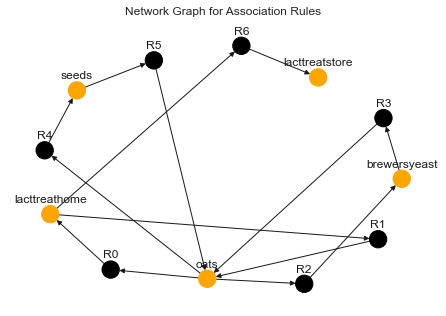

In [101]:
def draw_network(rules, rules_to_show):
      # Directional Graph from NetworkX
  network = nx.DiGraph(directed=True)
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12
  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 7)

__Inference:__

From the results it’s very clear that, higher the LIFT value, stronger the correlation between the antecedents and the consequents.

A lift greater than 1 suggests that the presence of the antecedent increases the chances that the consequent will occur in a given transaction.

Lift below 1 indicates that purchasing the antecedent reduces the chances of purchasing the consequent in the same transaction. Note: This could indicate that the items are seen by customers as alternatives to each other.
When the lift is 1, then purchasing the antecedent makes no difference on the chances of purchasing the consequent.


__Using Lift as our main performance measure, I could see that:__

Whoever buys (brewersyeast) ==>(also buys) (lacttreathome) with the confidence of 62.5%, which means almost 62% of the transactions has brewersyeast and lacttreathome.. The LIFT is also around 8.9627 ie., there is more chances to take lacttreathome whenever they take brewersyeast, i.e., both products are more likely to be bought together.